# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 2.0 MB/s eta 0:00:00


## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

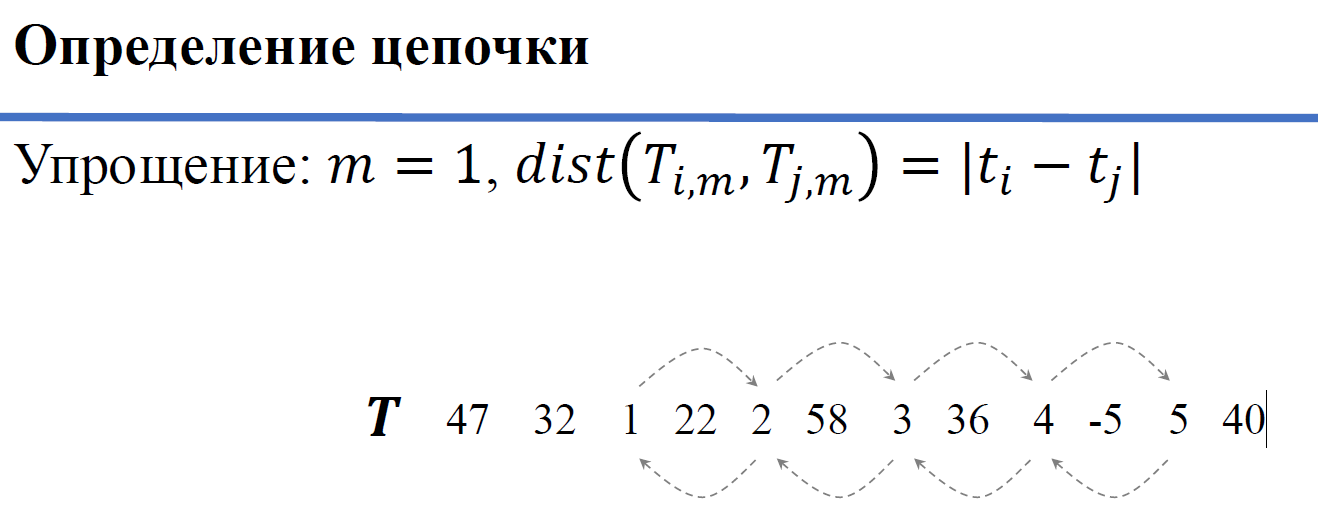

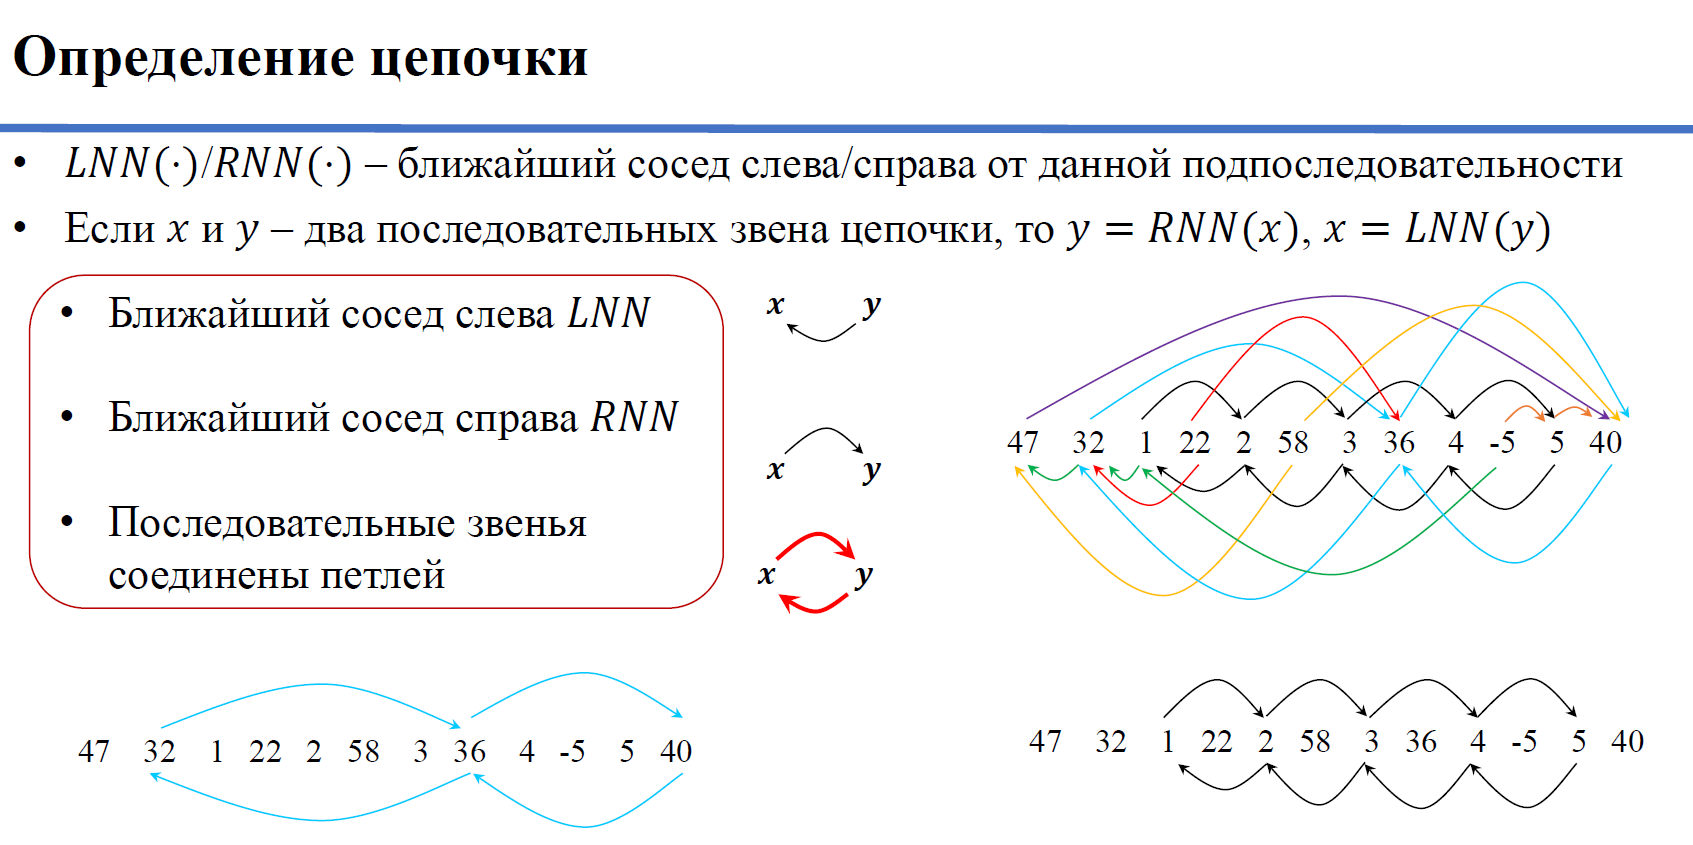

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

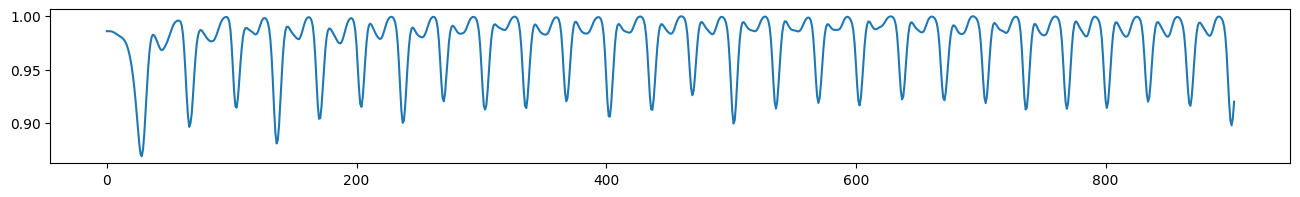

In [5]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('/content/drive/MyDrive/2023-Kufarov-TimeSeriesCourse-main/practice/06 Chains/datasets/Rotation Matrix.txt')
ax.plot(ts)

allc` из этой библиотеки. `stumpy` предназначена для работы с временными рядами и, в частности, предоставляет функциональность для поиска всех циклических шаблонов (паттернов) во временном ряду.

mp[:, 2] и mp[:, 3] два столбца из матрицы mp. Эти столбцы используются в качестве временного ряда для анализа.

stumpy.allc используется для выделения всех циклических паттернов во временном ряду. Функция возвращает два значения:

all_chain_set: множество всех найденных циклических паттернов.
unanchored_chain: циклический паттерн, который не является "прикрепленным" (unanchored).
unanchored_chain - содержит циклический паттерн, который не имеет явно определенной "прикрепленной" точки начала.

In [6]:
# INSERT YOUR CODE
m = 100

mp = stumpy.stump(ts, m=m)
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
unanchored_chain

array([190, 256, 657, 690, 755])

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

5 звеньев



## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

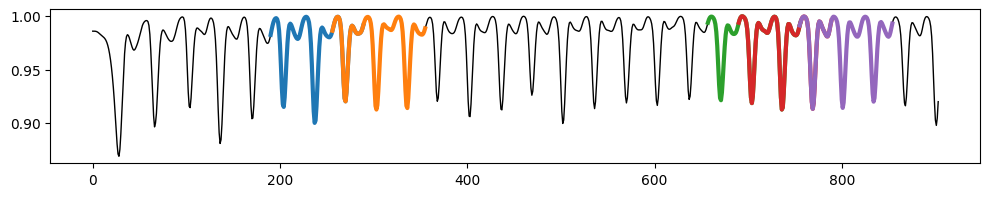

In [7]:
# INSERT YOUR CODE
fig, ax = plt.subplots(figsize=(12, 2))
ax.plot(ts, linewidth=1, color='black')
for i in range(unanchored_chain.shape[0]):
    y = ts[unanchored_chain[i]:unanchored_chain[i]+m]
    x = range(unanchored_chain[i], unanchored_chain[i]+m)
    plt.plot(x, y, linewidth=3)

plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Форма звеньем похожа

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

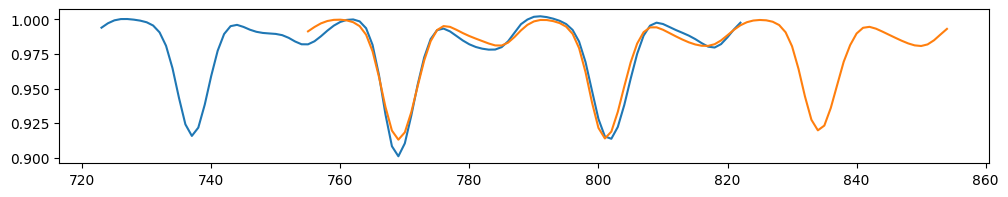

In [8]:
last_chain_index = unanchored_chain[-1] # последний элемент из списка и присваивает
last_chain_index #
last_chain_y = ts[last_chain_index:last_chain_index+m]  #часть данных временного ряда с последнего и вперед на m
last_chain_x = np.array(range(last_chain_index, last_chain_index+m)) #массив индексов
last_chain_x

chain_index1 = unanchored_chain[-2] # lдля предыдущих рядов
chain_index2 = unanchored_chain[-3]

chain1_y = ts[chain_index1:chain_index1+m]
chain1_x = np.array(range(chain_index1, chain_index1+m))
chain2_y = ts[chain_index2:chain_index2+m]
chain2_x = np.array(range(chain_index2, chain_index2+m))

pred_chain_y = chain1_y + (chain1_y-chain2_y)
pred_chain_x = chain1_x + (chain1_x-chain2_x)

fig, ax = plt.subplots(figsize=(12, 2))
for x, y in [(pred_chain_x, pred_chain_y), (last_chain_x, last_chain_y)]:
    plt.plot(x, y)
plt.show()

In [9]:
last_chain_x

array([755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767,
       768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780,
       781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793,
       794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806,
       807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819,
       820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832,
       833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845,
       846, 847, 848, 849, 850, 851, 852, 853, 854])

In [10]:
pred_chain_x


array([723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735,
       736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748,
       749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761,
       762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774,
       775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787,
       788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800,
       801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813,
       814, 815, 816, 817, 818, 819, 820, 821, 822])

❓ Проанализируйте и изложите содержательный смысл полученных результатов.